In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime as dt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [2]:
start_date = '2023-01-01'
end_date = '2023-12-31'

meta = yf.download('META', start=start_date, end=end_date)
apple = yf.download('AAPL', start=start_date, end=end_date)
amazon = yf.download('AMZN', start=start_date, end=end_date)
microsoft = yf.download('MSFT', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


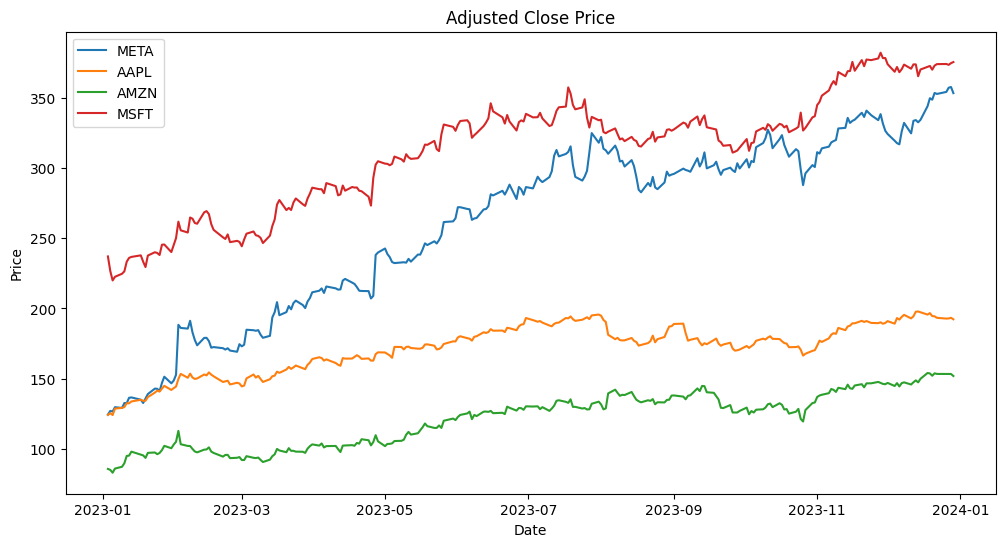

In [19]:
company_list = [meta, apple, amazon, microsoft]
company_name = ['META', 'AAPL', 'AMZN', 'MSFT']

plt.figure(figsize=(12, 6))
for i, company in enumerate(company_list):
    plt.plot(company['Adj Close'], label=company_name[i])
plt.title('Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(company_name)

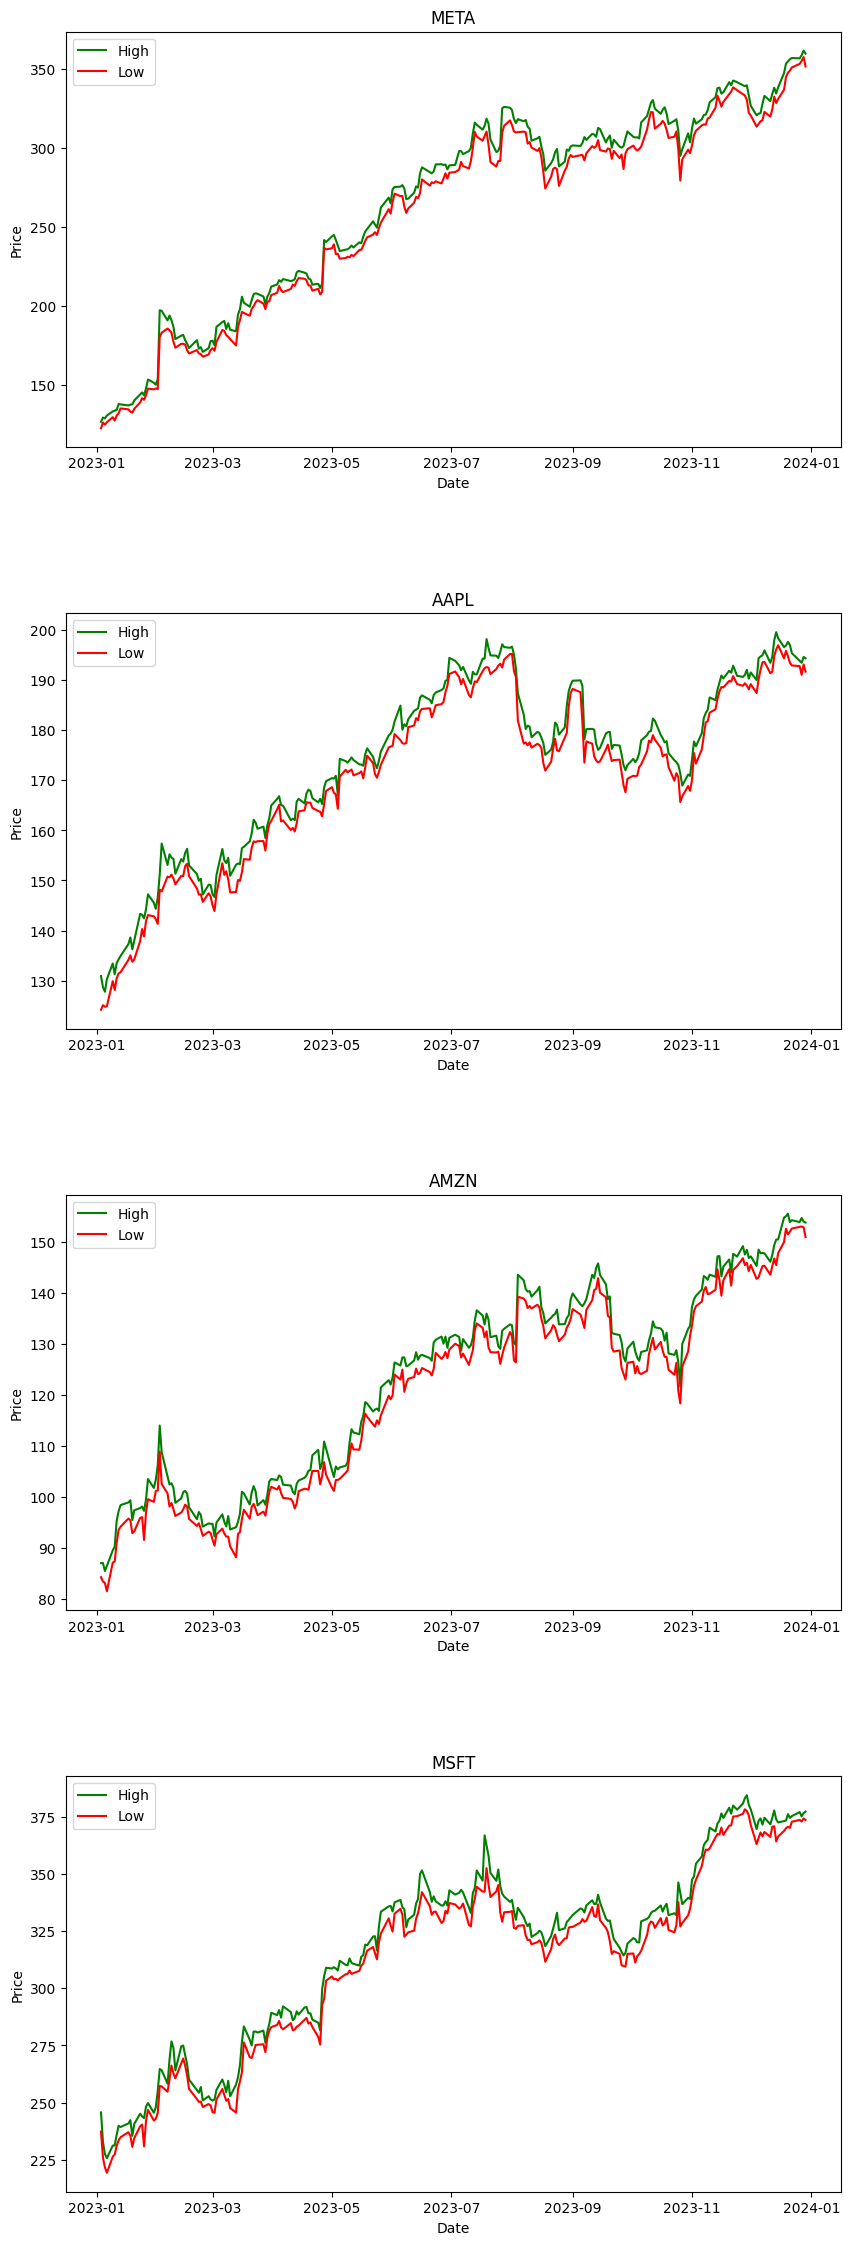

In [4]:
plt.figure(figsize=(10, len(company_list) * 6))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)

for i, company in enumerate(company_list):
    plt.subplot(len(company_list), 1, i + 1)
    plt.plot(company['High'], label=company_name[i], color='green')
    plt.plot(company['Low'], label=company_name[i], color='red')
    plt.title(company_name[i])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(['High', 'Low'])

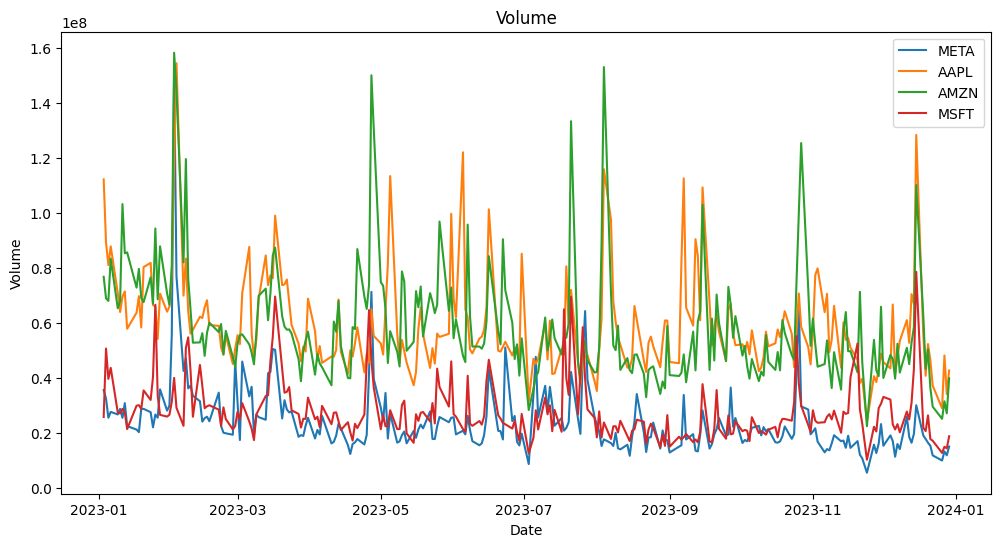

In [5]:
plt.figure(figsize=(12, 6))
for company in company_list:
    plt.plot(company['Volume'], label=company)

plt.title('Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(company_name)

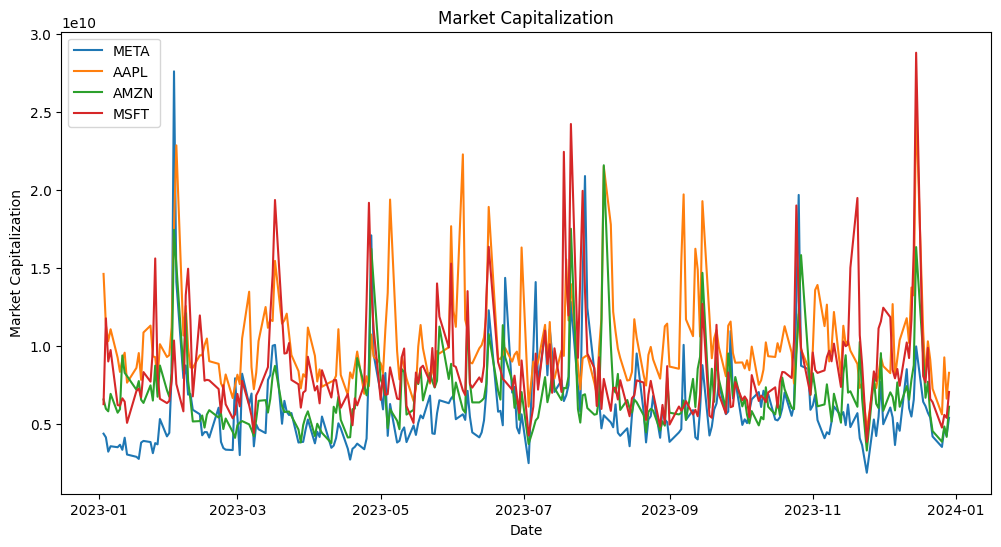

In [6]:
for company in company_list:
    company['Market Capitalization'] = company['Open'] * company['Volume']

plt.figure(figsize=(12, 6))
for company in company_list:
    plt.plot(company['Market Capitalization'], label=company)

plt.title('Market Capitalization')
plt.xlabel('Date')
plt.ylabel('Market Capitalization')
plt.legend(company_name)

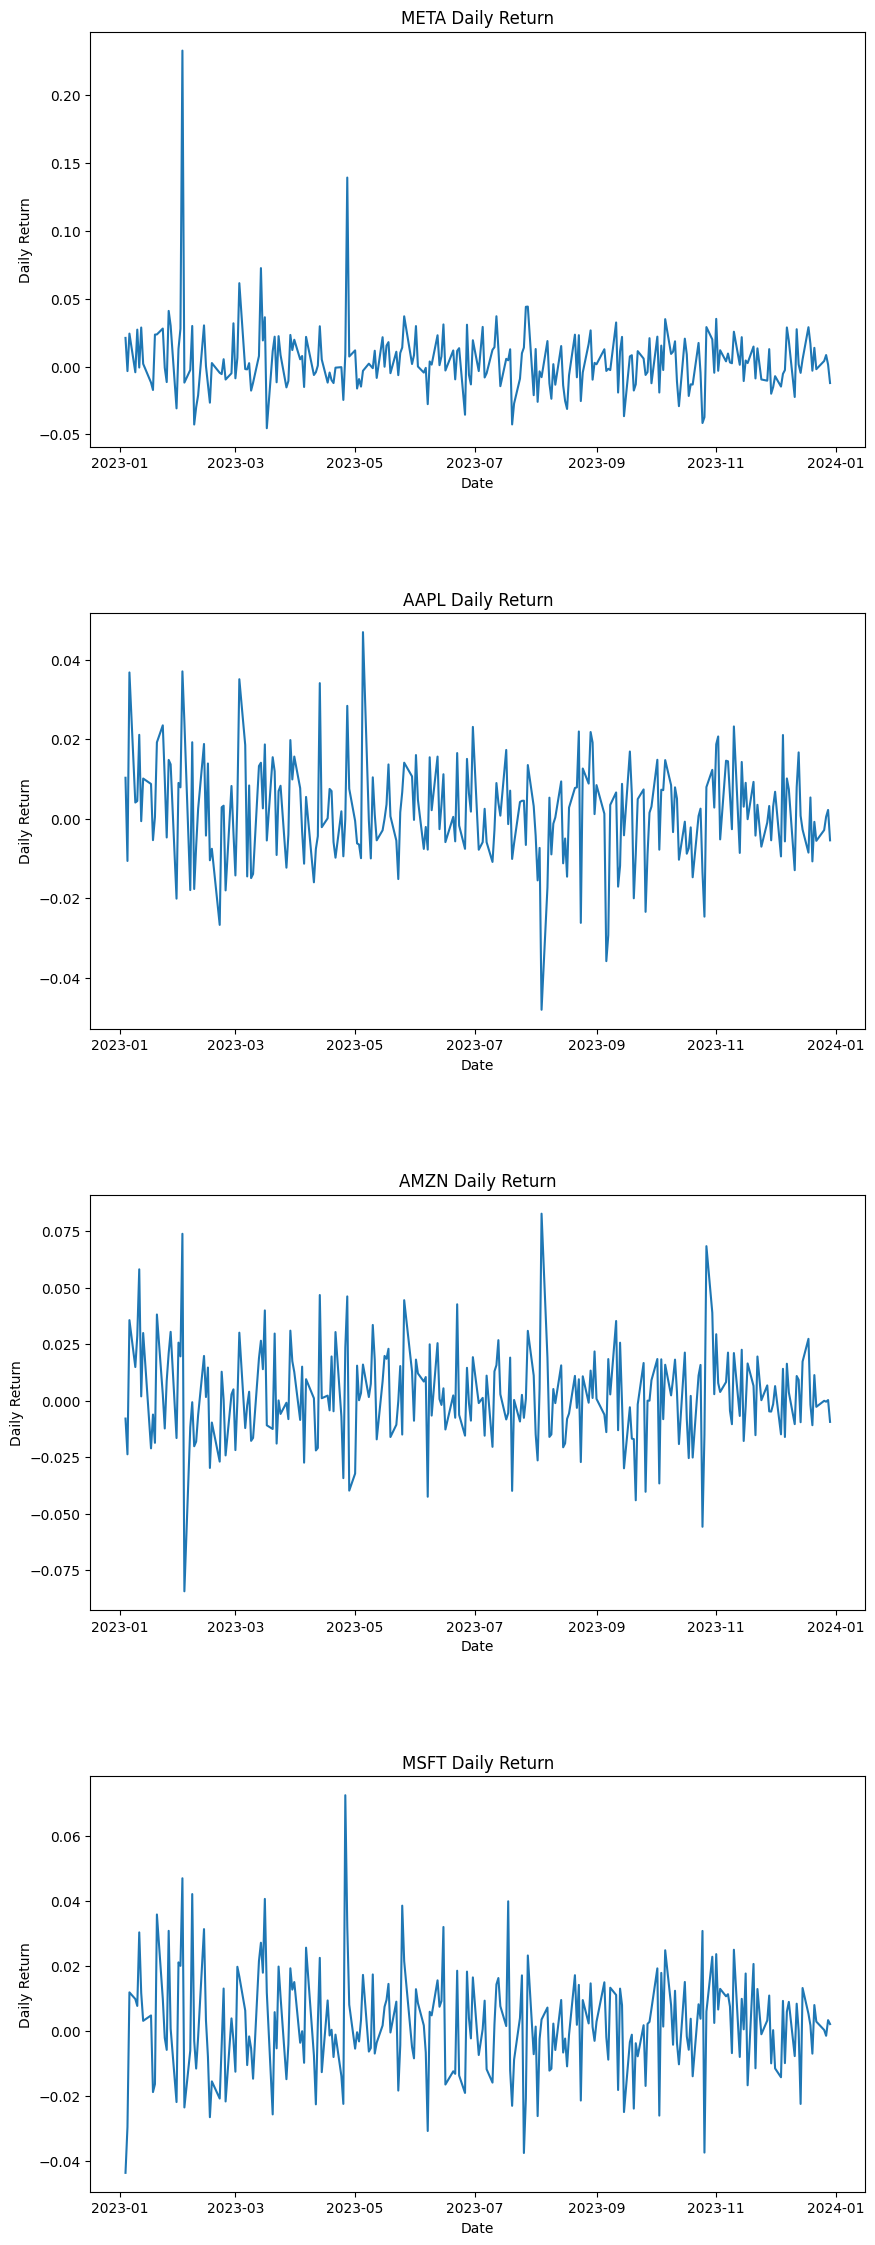

In [7]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

plt.figure(figsize=(10, len(company_list) * 6))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)
for i, company in enumerate(company_list):
    plt.subplot(len(company_list), 1, i+1)
    sns.lineplot(x='Date', y='Daily Return', data=company)
    plt.title(company_name[i] + ' Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')

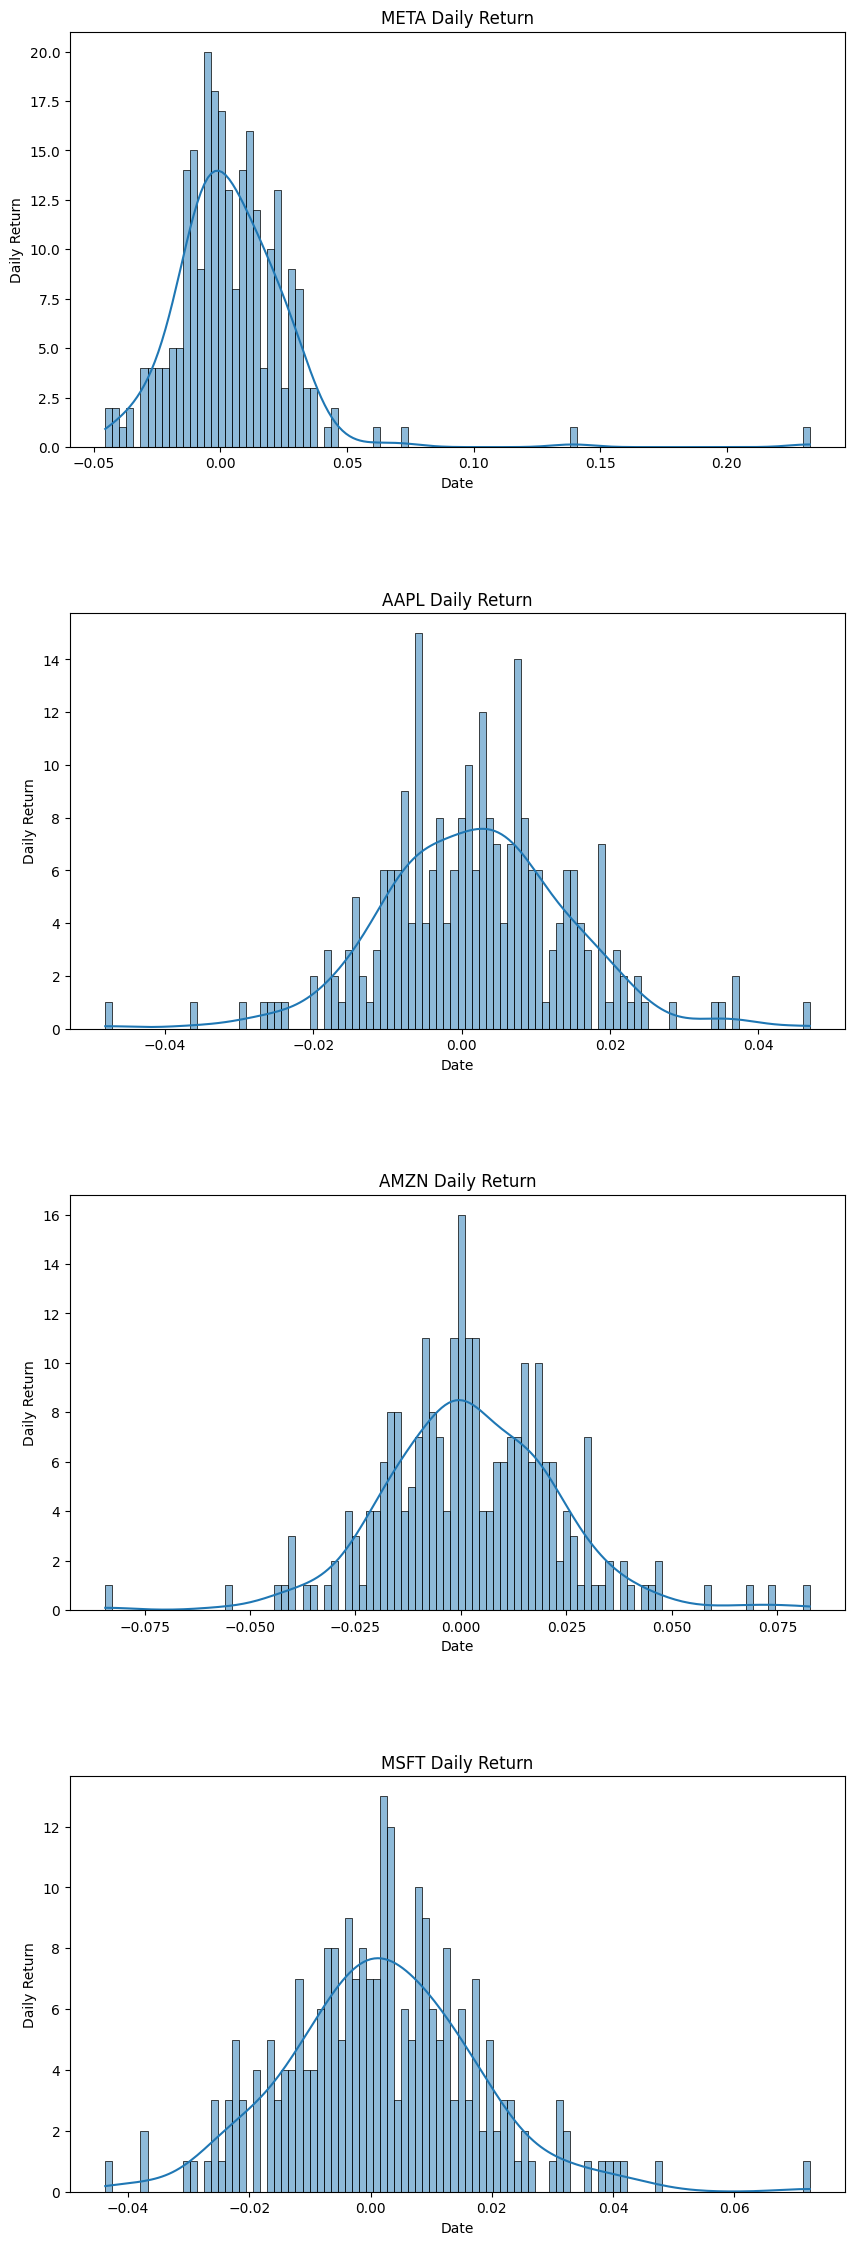

In [14]:
plt.figure(figsize=(10, len(company_list) * 6))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)
for i, company in enumerate(company_list):
    plt.subplot(len(company_list), 1, i+1)
    sns.histplot(x='Daily Return', data=company, bins=100, kde=True)
    plt.title(company_name[i] + ' Daily Return')
    plt.xlabel('Date')
    plt.ylabel('Daily Return')

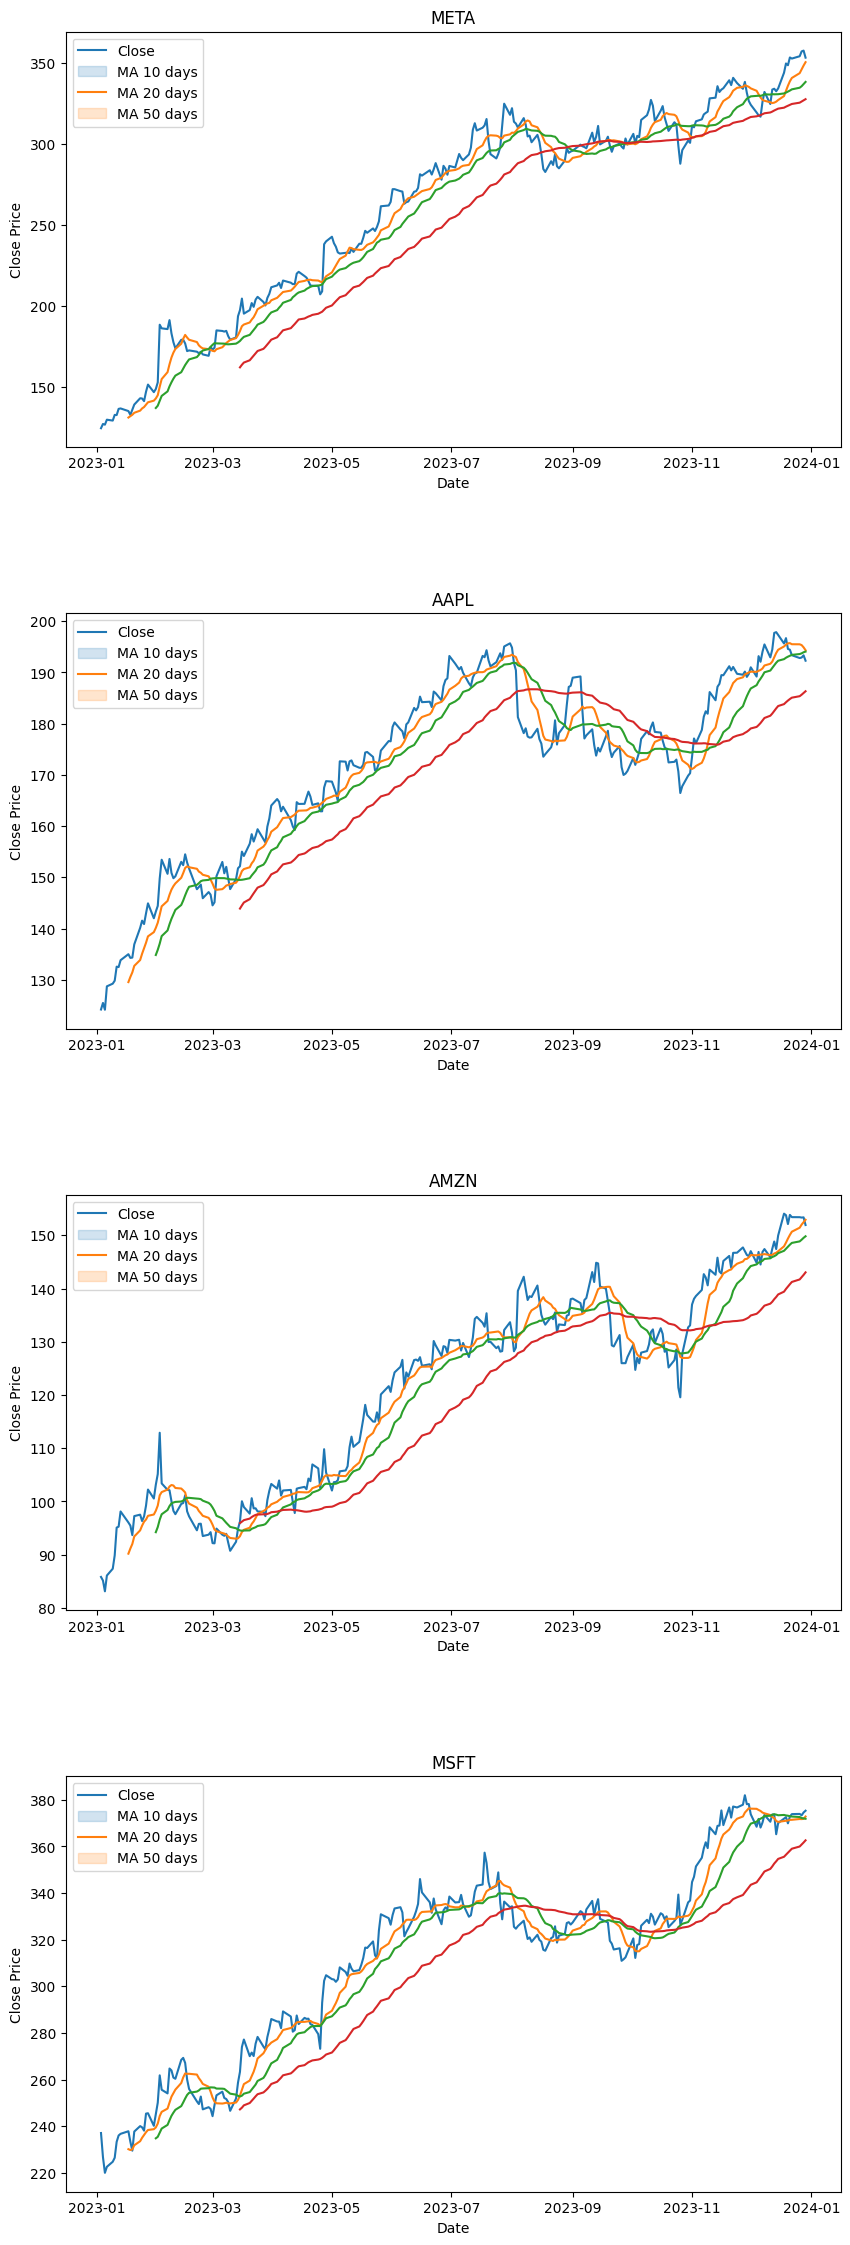

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f'MA for {ma} days'
        company[column_name] = company['Adj Close'].rolling(window=ma).mean()

plt.figure(figsize=(10, len(company_list) * 6))
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.4)

for i, company in enumerate(company_list):
    plt.subplot(len(company_list), 1, i+1)
    sns.lineplot(x='Date', y='Adj Close', data=company)
    sns.lineplot(x='Date', y='MA for 10 days', data=company)
    sns.lineplot(x='Date', y='MA for 20 days', data=company)
    sns.lineplot(x='Date', y='MA for 50 days', data=company)
    plt.title(company_name[i])
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(['Close', 'MA 10 days', 'MA 20 days', 'MA 50 days'])

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, Datetime

Lag for META: [1]
Predictions for META:
 250    353.310000
251    353.385180
252    353.459676
253    353.533495
254    353.606643
255    353.679126
256    353.750950
257    353.822122
258    353.892646
259    353.962529
dtype: float64
Lag for AAPL: [1]
Predictions for AAPL:
 250    192.155823
251    192.029540
252    191.905738
253    191.784370
254    191.665387
255    191.548742
256    191.434390
257    191.322284
258    191.212382
259    191.104640
dtype: float64
Lag for AMZN: [1]
Predictions for AMZN:
 250    151.888362
251    151.837256
252    151.786677
253    151.736622
254    151.687083
255    151.638057
256    151.589537
257    151.541519
258    151.493997
259    151.446966
dtype: float64
Lag for MSFT: [1]
Predictions for MSFT:
 250    375.360612
251    375.375211
252    375.389687
253    375.404039
254    375.418268
255    375.432377
256    375.446365
257    375.460234
258    375.473984
259    375.487618
dtype: float64


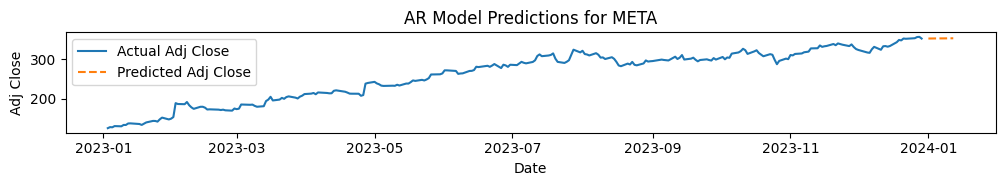

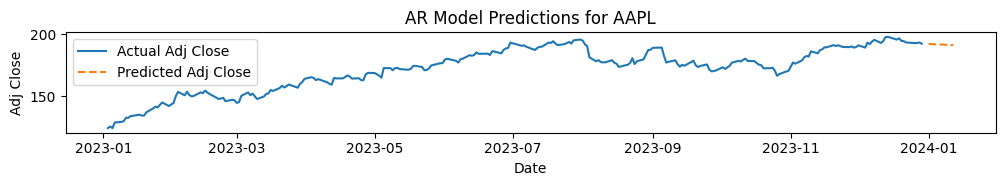

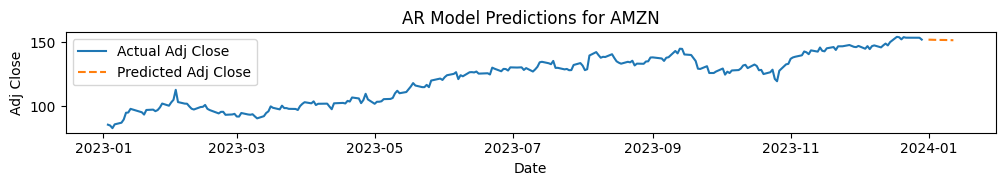

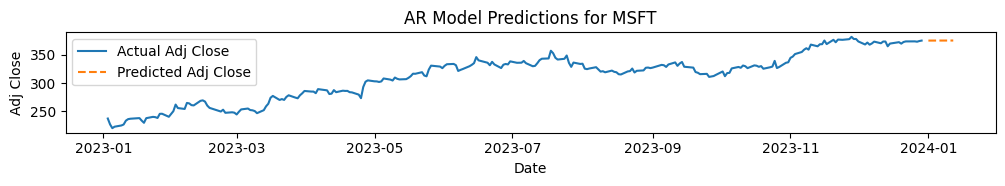

In [9]:
for i, company in enumerate(company_list):
    ar_model = AutoReg(company['Adj Close'], lags=1)
    ar_model_fit = ar_model.fit()
    print(f'Lag for {company_name[i]}: {ar_model_fit.model._lags}')
    
    predictions = ar_model_fit.predict(start=len(company), end=len(company) + 9)
    print(f'Predictions for {company_name[i]}:\n', predictions)

    plt.figure(figsize=(12, 6))
    plt.subplot(len(company_list), 1, i+1)
    plt.plot(company.index, company['Adj Close'], label='Actual Adj Close')
    plt.plot(pd.date_range(start=company.index[-1], periods=11, freq='B')[1:], predictions, label='Predicted Adj Close', linestyle='--')
    plt.title(f'AR Model Predictions for {company_name[i]}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

ARIMA Model for META:                                SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -783.637
Date:                Fri, 21 Jun 2024   AIC                           1579.274
Time:                        16:40:17   BIC                           1600.379
Sample:                             0   HQIC                          1587.769
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0148      0.074      0.199      0.842      -0.130       0.160
ar.L2         -0.0057      0.079     -0.072      0.942      -0.160       0.149
ar.L3          0.0009      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

ARIMA Model for MSFT:                                SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -738.847
Date:                Fri, 21 Jun 2024   AIC                           1489.693
Time:                        16:40:17   BIC                           1510.798
Sample:                             0   HQIC                          1498.188
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0456      0.056     -0.816      0.415      -0.155       0.064
ar.L2         -0.1161      0.064     -1.807      0.071      -0.242       0.010
ar.L3          0.0094      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


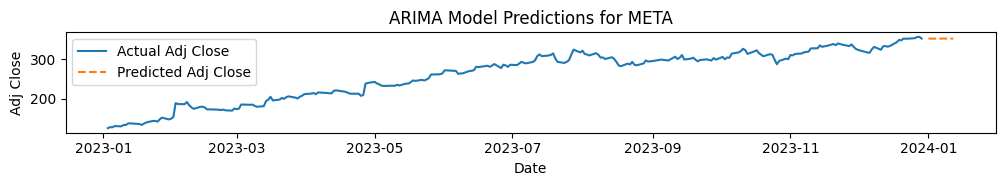

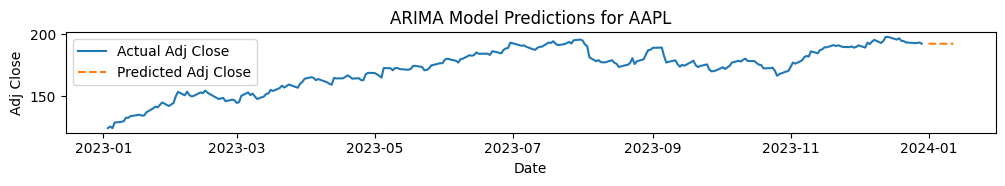

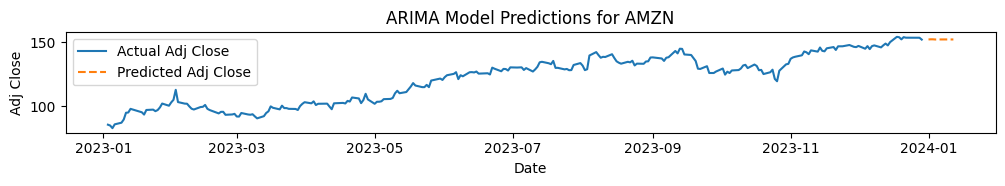

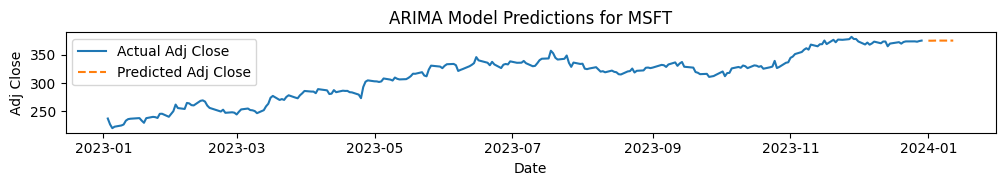

In [10]:
for i, company in enumerate(company_list):
    arima_model = ARIMA(company['Adj Close'], order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    print(f'ARIMA Model for {company_name[i]}: {arima_model_fit.summary()}')

    predictions = arima_model_fit.forecast(steps=10)
    print(f'Predictions for {company_name[i]}:\n', predictions)

    plt.figure(figsize=(12, 6))
    plt.subplot(len(company_list), 1, i+1)
    plt.plot(company.index, company['Adj Close'], label='Actual Adj Close')
    plt.plot(pd.date_range(start=company.index[-1], periods=11, freq='B')[1:], predictions, label='Predicted Adj Close', linestyle='--')
    plt.title(f'ARIMA Model Predictions for {company_name[i]}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been prov

SES Model for META:                        SimpleExpSmoothing Model Results                       
Dep. Variable:              Adj Close   No. Observations:                  250
Model:             SimpleExpSmoothing   SSE                           7898.515
Optimized:                       True   AIC                            867.242
Trend:                           None   BIC                            874.285
Seasonal:                        None   AICC                           867.406
Seasonal Periods:                None   Date:                 Fri, 21 Jun 2024
Box-Cox:                        False   Time:                         16:40:18
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
initial_level              124.4

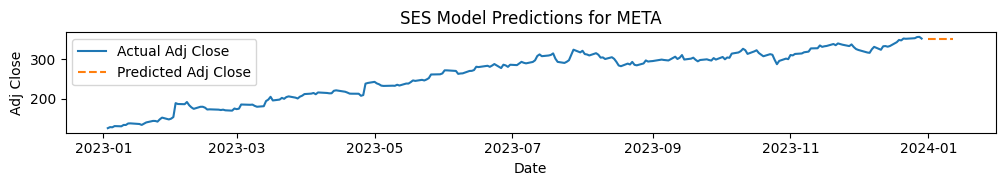

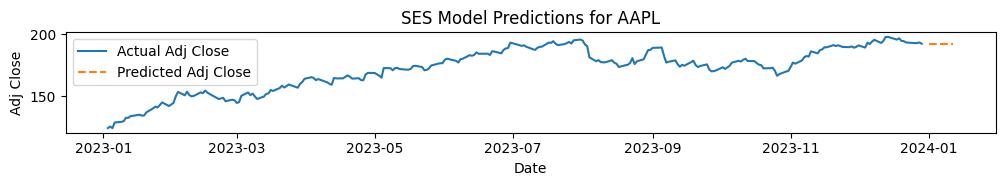

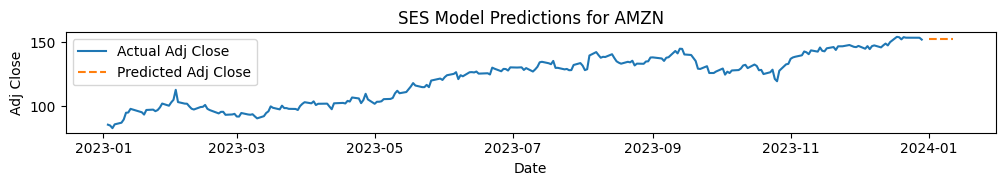

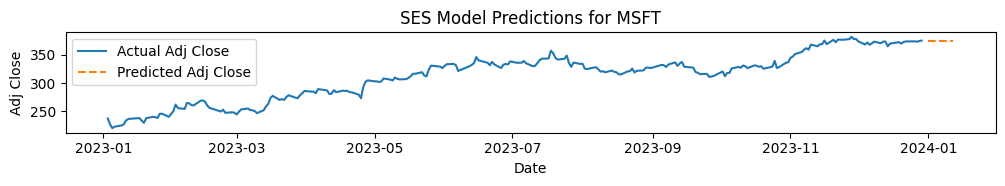

In [11]:
for i, company in enumerate(company_list):
    ses_model = SimpleExpSmoothing(company['Adj Close'])
    ses_model_fit = ses_model.fit()
    print(f'SES Model for {company_name[i]}: {ses_model_fit.summary()}')

    predictions = ses_model_fit.forecast(steps=10)
    print(f'Predictions for {company_name[i]}:\n', predictions)

    plt.figure(figsize=(12, 6))
    plt.subplot(len(company_list), 1, i+1)
    plt.plot(company.index, company['Adj Close'], label='Actual Adj Close')
    plt.plot(pd.date_range(start=company.index[-1], periods=11, freq='B')[1:], predictions, label='Predicted Adj Close', linestyle='--')
    plt.title(f'SES Model Predictions for {company_name[i]}')
    plt.xlabel('Date')
    plt.ylabel('Adj Close')
    plt.legend()

In [15]:
def evaluate_model(true_values, predicted_values):
    mae = mean_absolute_error(true_values, predicted_values)
    mse = mean_squared_error(true_values, predicted_values)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

for i, company in enumerate(company_list):
    true_values = company['Adj Close'].iloc[-10:].values

    # AR Model
    ar_model = AutoReg(company['Adj Close'], lags=1)
    ar_model_fit = ar_model.fit()
    ar_predictions = ar_model_fit.predict(start=len(company), end=len(company) + 9)
    ar_mae, ar_mse, ar_rmse = evaluate_model(true_values, ar_predictions)
    print(f'AR Model for {company_name[i]}: MAE: {ar_mae}, MSE: {ar_mse}, RMSE: {ar_rmse}')

    # ARIMA Model
    arima_model = ARIMA(company['Adj Close'], order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    arima_predictions = arima_model_fit.forecast(steps=10)
    arima_mae, arima_mse, arima_rmse = evaluate_model(true_values, arima_predictions)
    print(f'ARIMA Model for {company_name[i]}: MAE: {arima_mae}, MSE: {arima_mse}, RMSE: {arima_rmse}')

    # SES Model
    ses_model = SimpleExpSmoothing(company['Adj Close'])
    ses_model_fit = ses_model.fit()
    ses_predictions = ses_model_fit.forecast(steps=10)
    ses_mae, ses_mse, ses_rmse = evaluate_model(true_values, ses_predictions)
    print(f'SES Model for {company_name[i]}: MAE: {ses_mae}, MSE: {ses_mse}, RMSE: {ses_rmse}')

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, Datetime

AR Model for META: MAE: 4.663969340476894, MSE: 51.90143493142331, RMSE: 7.204265051441633


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is avai

ARIMA Model for META: MAE: 4.613208127917756, MSE: 51.12429259149451, RMSE: 7.1501253549496955
SES Model for META: MAE: 4.63646852165582, MSE: 51.75755709180923, RMSE: 7.194272519984855
AR Model for AAPL: MAE: 2.717694459884308, MSE: 9.157095172163721, RMSE: 3.0260692609660675
ARIMA Model for AAPL: MAE: 2.035262424115447, MSE: 6.832348648828988, RMSE: 2.6138761732012075
SES Model for AAPL: MAE: 2.049386584178683, MSE: 6.877846960843047, RMSE: 2.6225649583648156
AR Model for AMZN: MAE: 1.6470644704682769, MSE: 3.0984618884362045, RMSE: 1.7602448376394133
ARIMA Model for AMZN: MAE: 1.2987465661177027, MSE: 2.1056494925149067, RMSE: 1.45108562549386
SES Model for AMZN: MAE: 1.3016603917552345, MSE: 2.1401058939542197, RMSE: 1.4629100771934753
AR Model for MSFT: MAE: 2.571335966554136, MSE: 9.40391827406538, RMSE: 3.066580876817923
ARIMA Model for MSFT: MAE: 2.4494542566408315, MSE: 8.797124116246781, RMSE: 2.96599462512102
SES Model for MSFT: MAE: 2.462903684433286, MSE: 8.937614996802939

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is avai

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


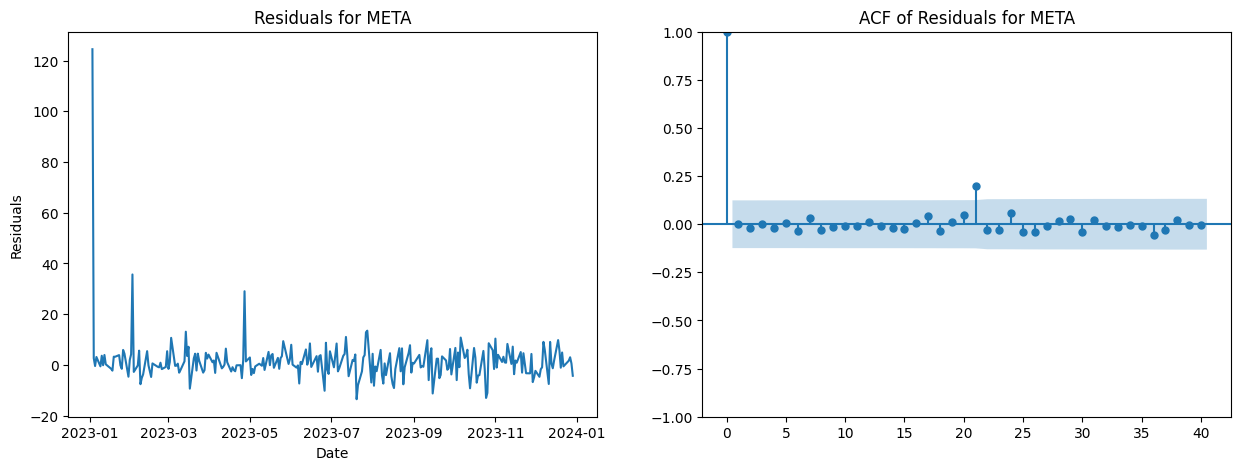

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


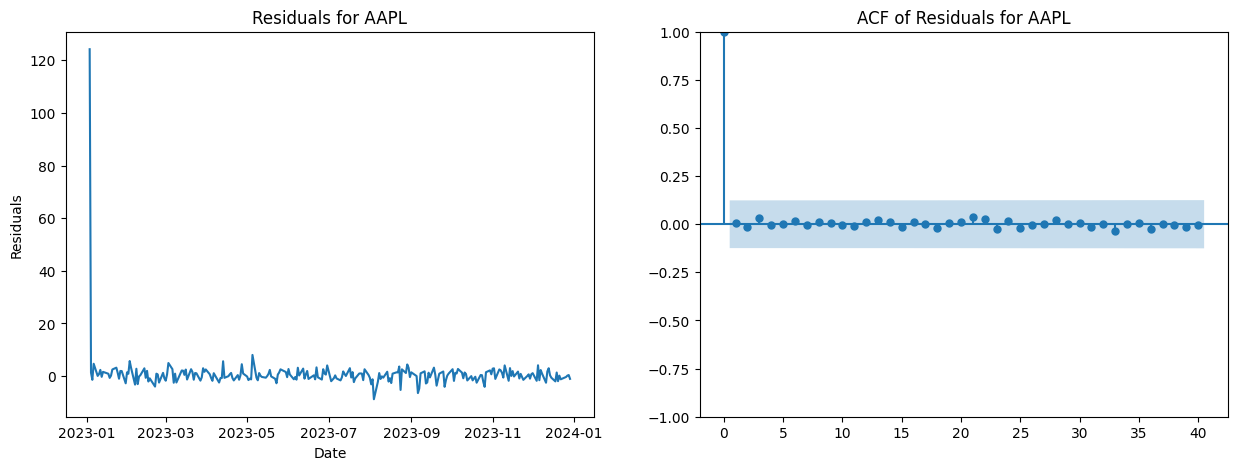

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


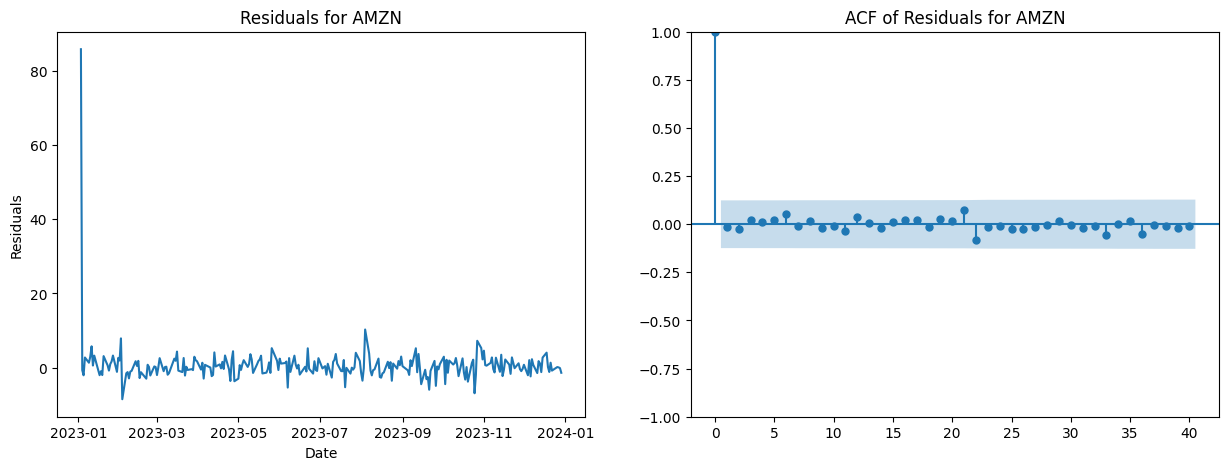

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


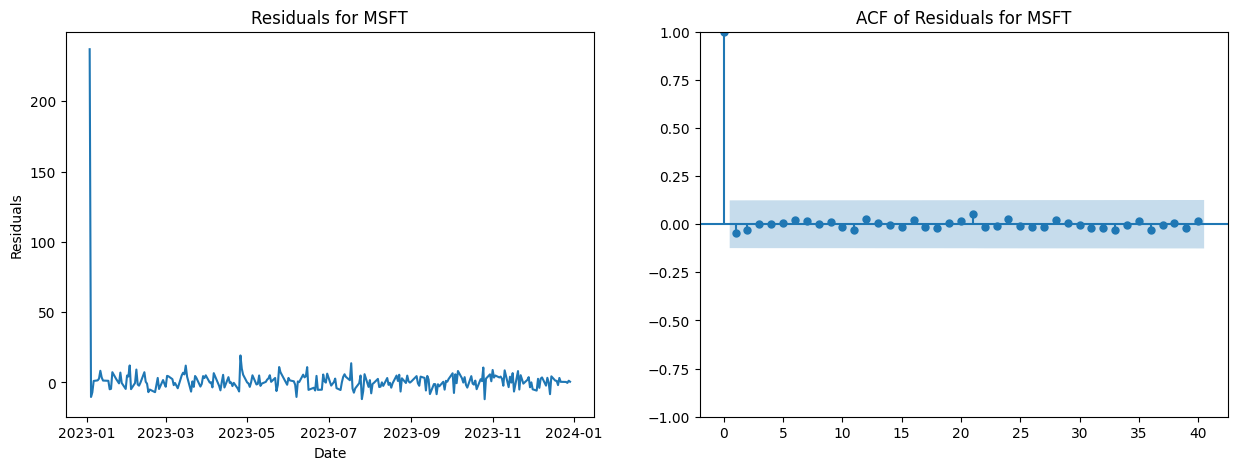

In [17]:
def plot_residuals(model_fit, company_name):
    residuals = model_fit.resid
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    ax[0].plot(residuals)
    ax[0].set_title(f'Residuals for {company_name}')
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Residuals')
    
    sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax[1])
    ax[1].set_title(f'ACF of Residuals for {company_name}')
    
    plt.show()

for i, company in enumerate(company_list):
    arima_model = ARIMA(company['Adj Close'], order=(5, 1, 0))
    arima_model_fit = arima_model.fit()
    plot_residuals(arima_model_fit, company_name[i])